In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy import stats
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBRegressor

In [34]:
data = pd.read_csv('/Users/anithasmac/PycharmProjects/IndustrialCopper/CopperModelling/Copper_data_cleaned.csv')

In [35]:
data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,1970-01-01 00:00:00.020210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,854.00
1,1970-01-01 00:00:00.020210401,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,DX51D+Z,1668701718,1970-01-01 00:00:00.020210401,1047.00
2,1970-01-01 00:00:00.020210401,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01 00:00:00.020210101,644.33
3,1970-01-01 00:00:00.020210401,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01 00:00:00.020210101,768.00
4,1970-01-01 00:00:00.020210401,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01 00:00:00.020210301,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,1970-01-01 00:00:00.020200702,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,DX51D+Z,164141591,1970-01-01 00:00:00.020200701,591.00
150444,1970-01-01 00:00:00.020200702,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,DX51D+Z,164141591,1970-01-01 00:00:00.020200701,589.00
150445,1970-01-01 00:00:00.020200702,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,DX51D+Z,164141591,1970-01-01 00:00:00.020200701,619.00
150446,1970-01-01 00:00:00.020200702,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,DX51D+Z,164141591,1970-01-01 00:00:00.020200701,601.00


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150448 entries, 0 to 150447
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      150448 non-null  object 
 1   quantity tons  150448 non-null  float64
 2   customer       150448 non-null  float64
 3   country        150448 non-null  float64
 4   status         150448 non-null  object 
 5   item type      150448 non-null  object 
 6   application    150448 non-null  float64
 7   thickness      150448 non-null  float64
 8   width          150448 non-null  float64
 9   material_ref   150448 non-null  object 
 10  product_ref    150448 non-null  int64  
 11  delivery date  150448 non-null  object 
 12  selling_price  150448 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory usage: 14.9+ MB


In [59]:
data.describe()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
count,150448,150448.000000,1.504480e+05,150448.000000,150448,150448,150448.000000,150448.000000,150448.000000,150448,1.504480e+05,150448,150448.000000
unique,250,NaN,NaN,NaN,2,7,NaN,NaN,NaN,10869,NaN,26,NaN
top,1970-01-01 00:00:00.020201202,NaN,NaN,NaN,Won,W,NaN,NaN,NaN,DX51D+Z,NaN,1970-01-01 00:00:00.020210101,NaN
freq,2547,NaN,NaN,NaN,116010,91956,NaN,NaN,NaN,83278,NaN,27799,NaN
mean,NaN,94.458303,3.027510e+07,45.390680,NaN,NaN,25.194905,2.618359,1297.840286,NaN,4.748400e+08,NaN,825.763802
std,NaN,440.945838,9.455052e+06,24.487997,NaN,NaN,17.640171,7.115448,266.156482,NaN,7.172630e+08,NaN,290.878736
min,NaN,-2000.000000,1.245800e+04,25.000000,NaN,NaN,2.000000,0.180000,1.000000,NaN,6.117280e+05,NaN,-1160.000000
25%,NaN,10.698971,3.019689e+07,26.000000,NaN,NaN,10.000000,0.740000,1176.000000,NaN,6.283770e+05,NaN,671.000000
50%,NaN,29.934641,3.020531e+07,30.000000,NaN,NaN,15.000000,1.500000,1250.000000,NaN,6.406650e+05,NaN,811.000000
75%,NaN,64.867439,3.027982e+07,78.000000,NaN,NaN,41.000000,3.000000,1500.000000,NaN,1.332077e+09,NaN,951.000000


In [38]:
data.dtypes

item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [39]:
# Calculate correlation matrix
numeric_data = data.select_dtypes(include=[float, int])
corr_matrix = numeric_data.corr()

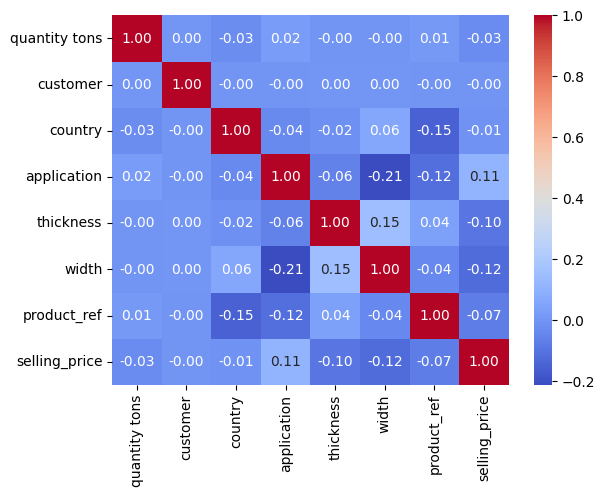

In [40]:
# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [41]:
features = ['application', 'thickness', 'width', 'selling_price']
X = data[features]


# Calculate Q1 and Q3
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((X < lower_bound) | (X > upper_bound)).any(axis=1)
outliers_df = data[outliers]

print(f'Number of outliers detected: {outliers_df.shape[0]}')


Number of outliers detected: 20215


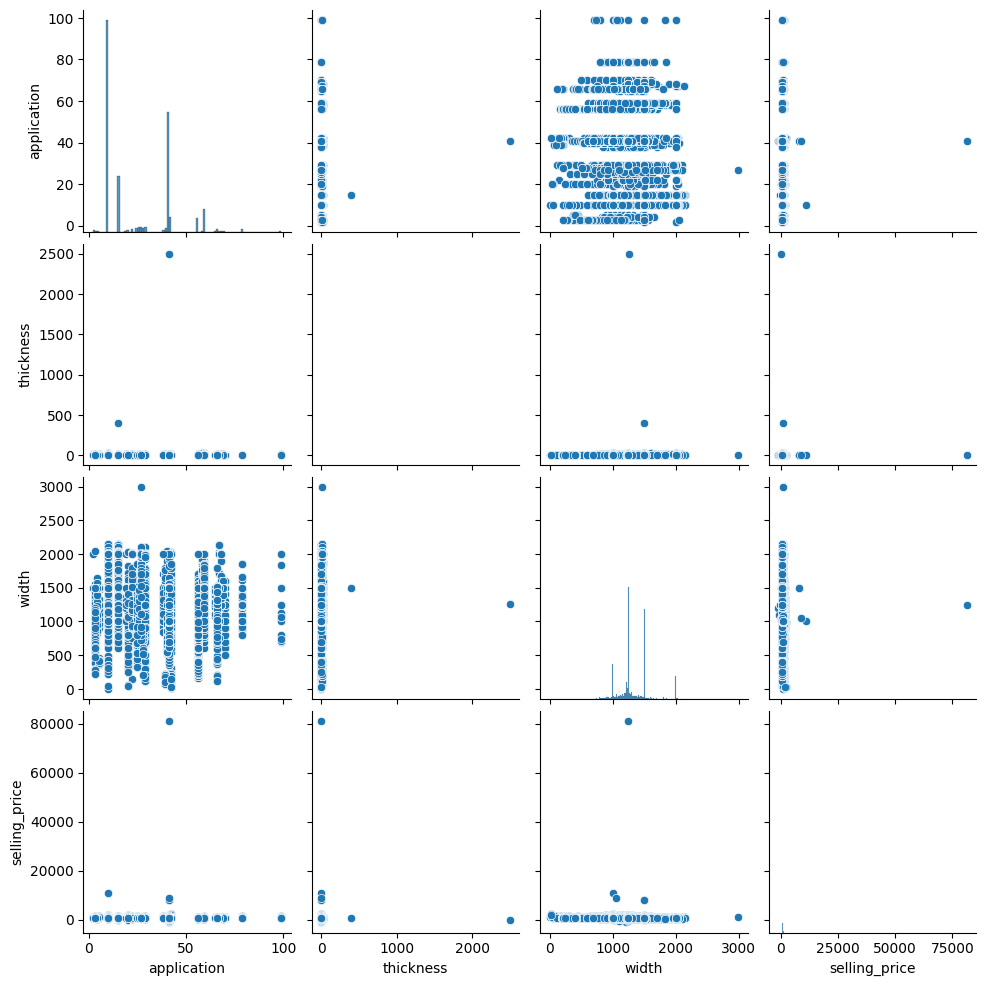

In [10]:
sns.pairplot(data[features])
plt.show()

In [49]:
# Check skewness 
skewness = data[features].skew()
print("Skewness before capping:")
print(skewness)

Skewness before capping:
application        0.751034
thickness        288.708029
width              0.352751
selling_price    141.328716
dtype: float64


In [50]:
# Cap outliers at the boundary values
data_capped = data.copy()
for column in X.columns:
    data_capped[column] = np.where(data_capped[column] > upper_bound[column], upper_bound[column],
                                   np.where(data_capped[column] < lower_bound[column], lower_bound[column],
                                            data_capped[column]))

In [51]:
# Check skewness for capped data
skewness = data_capped[features].skew()
print("Skewness after capping:")
print(skewness)

Skewness after capping:
application      0.734887
thickness        1.013516
width            0.657961
selling_price    0.450950
dtype: float64


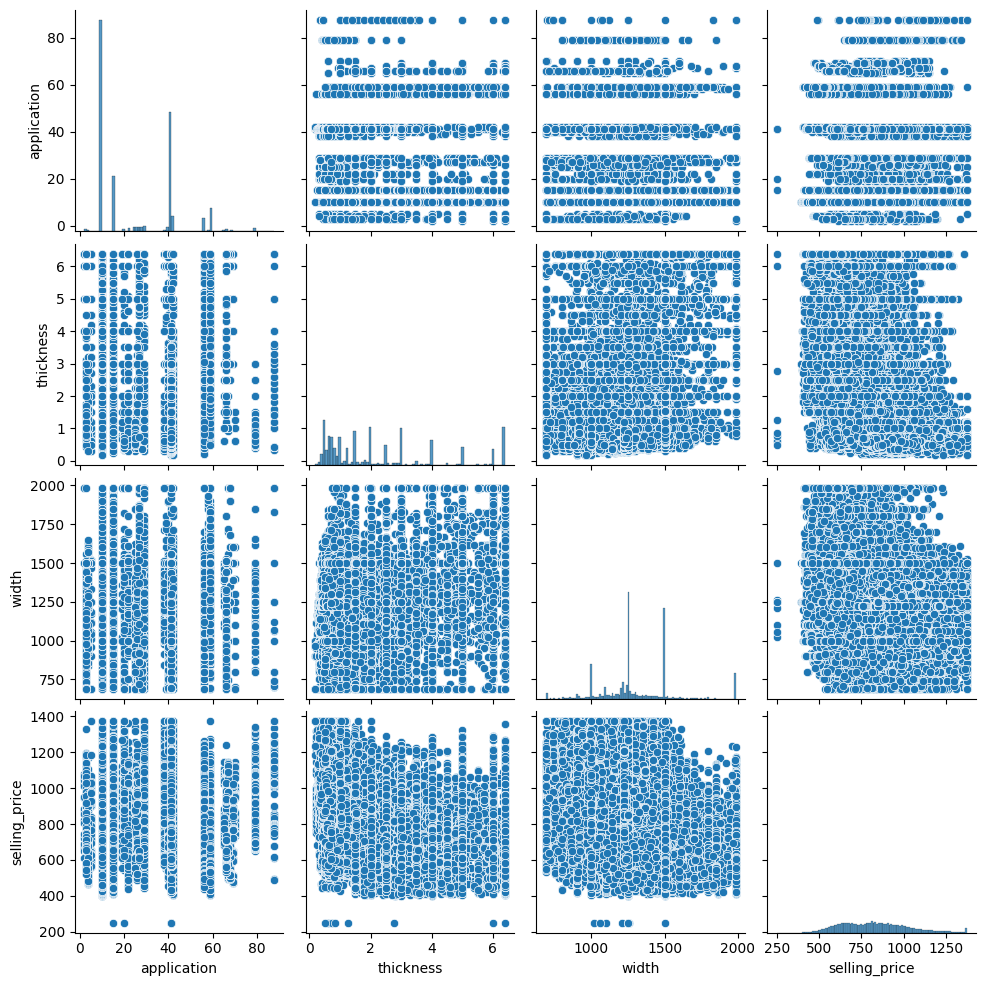

In [45]:
sns.pairplot(data_capped[features])
plt.show()

In [52]:
# Convert to datetime
data_capped['item_date'] = pd.to_datetime(data_capped['item_date'])
data_capped['delivery date'] = pd.to_datetime(data_capped['delivery date'])

In [53]:
data_capped['item_date'] = data_capped['item_date'].dt.year
data_capped['delivery date'] = data_capped['delivery date'].dt.year

In [54]:
data_capped = data_capped.drop(['material_ref', 'customer', 'status'], axis=1)

### Log Transformation

In [55]:
data_capped['thickness'] = np.log1p(data_capped['thickness'])
data_capped['width'] = np.log1p(data_capped['width'])
data_capped['application'] = np.log1p(data_capped['application'])
data_capped['selling_price'] = np.log1p(data_capped['selling_price'])

In [56]:
# Check skewness 
skewness = data_capped[features].skew()
print("Skewness after transformation:")
print(skewness)

Skewness after transformation:
application      0.263149
thickness        0.426882
width           -0.156431
selling_price   -0.088786
dtype: float64


### Split the data

In [71]:
# Define features and target
X = data_capped.drop('selling_price', axis=1)
y = data_capped['selling_price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
categorical_features = ['item type']  
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# One-Hot Encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


### Decision Tree Regressor

In [73]:
# Create a pipeline with preprocessor and the model
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=42))
])
pipeline1.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred)
print(f'Decision Tree Regressor MSE: {mse1}')

Decision Tree Regressor MSE: 0.0435444116004451


### Random Forest Regressor

In [74]:
# Create a pipeline with preprocessor and the model
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])
pipeline2.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline2.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred)
print(f'Random Forest Regressor MSE: {mse2}')

Random Forest Regressor MSE: 0.025959994817468402


### Extra Trees Regressor

In [75]:
# Create a pipeline with preprocessor and the model
pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ExtraTreesRegressor(random_state=42))
])
pipeline3.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline3.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred)
print(f'Extra Trees Regressor MSE: {mse3}')

Extra Trees Regressor MSE: 0.03170855533549508


### XGB Regressor

In [76]:
# Create a pipeline with preprocessor and the model
pipeline4 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])
pipeline4.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline4.predict(X_test)
mse4 = mean_squared_error(y_test, y_pred)
print(f'XGBoost Regressor MSE: {mse4}')

XGBoost Regressor MSE: 0.02832383064676788


### Cross Validation

In [86]:
# Cross-validate the model
cv_scores1 = cross_val_score(pipeline1, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores2 = cross_val_score(pipeline2, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores3 = cross_val_score(pipeline3, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores4 = cross_val_score(pipeline4, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE for Decision Tree: {-cv_scores1.mean()}')
print(f'Cross-validated MSE for Random Forest: {-cv_scores2.mean()}')
print(f'Cross-validated MSE for Extra Trees: {-cv_scores3.mean()}')
print(f'Cross-validated MSE for XGBoost: {-cv_scores4.mean()}')

Cross-validated MSE for Decision Tree: 0.06910781882425862
Cross-validated MSE for Random Forest: 0.05041502923841804
Cross-validated MSE for Extra Trees: 0.05494199305339751
Cross-validated MSE for XGBoost: 0.047215324625038455


In [77]:
print(f'Decision Tree Regressor MSE: {mse1}')
print(f'Random Forest Regressor MSE: {mse2}')
print(f'Extra Trees Regressor MSE: {mse3}')
print(f'XGBoost Regressor MSE: {mse4}')

Decision Tree Regressor MSE: 0.0435444116004451
Random Forest Regressor MSE: 0.025959994817468402
Extra Trees Regressor MSE: 0.03170855533549508
XGBoost Regressor MSE: 0.02832383064676788


In [81]:
# Save the Random Forest Regressor model to a pickle file
with open('random_forest_regressor.pkl', 'wb') as file:
    pickle.dump(pipeline2, file)

print("Random Forest Regressor model saved as 'random_forest_regressor.pkl'.")

Random Forest Regressor model saved as 'random_forest_regressor.pkl'.


In [82]:
with open('random_forest_regressor.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [83]:
new_data = pd.DataFrame({
    'item_date': [2023],
    'quantity tons': [50],
    'country': [32],
    'item type': ['W'],
    'application': [1],
    'thickness': [0.5],
    'width': [120],
    'product_ref': [628112],
    'delivery date': [2023]

})

# Predict the status using the loaded model
predicted_price = loaded_model.predict(new_data)

In [84]:
predicted_price

array([6.64545374])